# ResNet20 Study
- This notebook simply downloads and breaks down a ResNet20 model
- The purpose of this study is just to see how it can be used
- The model can be best seen in this link: https://github.com/akamaster/pytorch_resnet_cifar10/blob/master/resnet.py

## Load Packages

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Downloading the model
- The override command is because github limits the download rate. This overrides it.

In [2]:
# Override the validation function to bypass the rate limit error
torch.hub._validate_not_a_forked_repo = lambda a, b, c: True

# Load the pretrained ResNet-20 model for CIFAR-10
model = torch.hub.load('chenyaofo/pytorch-cifar-models', 'cifar10_resnet20', pretrained=True)

Using cache found in /users/micas/rantonio/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


## Normalization of Input Data
- Note, that these normalize values come from the training set of CIFAR10
- This normalization is a necessity since the CIFAR10 was trained with the normalization in place
- The first set of 3 tuples is for the mean, while the 2nd is for the std. dev.

In [3]:
# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), 
                         (0.2023, 0.1994, 0.2010))
])

## Downloading CIFAR-10 dataset

In [4]:
# Load the CIFAR-10 test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

## Set Model for Evaluation
- You can also see here the details of the model

In [5]:
# Set the model to evaluation mode
model.eval()

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

- The code below shows the model better 

In [22]:
for name, module in model.named_modules():
   print(name)


conv1
bn1
relu
layer1
layer1.0
layer1.0.conv1
layer1.0.bn1
layer1.0.relu
layer1.0.conv2
layer1.0.bn2
layer1.1
layer1.1.conv1
layer1.1.bn1
layer1.1.relu
layer1.1.conv2
layer1.1.bn2
layer1.2
layer1.2.conv1
layer1.2.bn1
layer1.2.relu
layer1.2.conv2
layer1.2.bn2
layer2
layer2.0
layer2.0.conv1
layer2.0.bn1
layer2.0.relu
layer2.0.conv2
layer2.0.bn2
layer2.0.downsample
layer2.0.downsample.0
layer2.0.downsample.1
layer2.1
layer2.1.conv1
layer2.1.bn1
layer2.1.relu
layer2.1.conv2
layer2.1.bn2
layer2.2
layer2.2.conv1
layer2.2.bn1
layer2.2.relu
layer2.2.conv2
layer2.2.bn2
layer3
layer3.0
layer3.0.conv1
layer3.0.bn1
layer3.0.relu
layer3.0.conv2
layer3.0.bn2
layer3.0.downsample
layer3.0.downsample.0
layer3.0.downsample.1
layer3.1
layer3.1.conv1
layer3.1.bn1
layer3.1.relu
layer3.1.conv2
layer3.1.bn2
layer3.2
layer3.2.conv1
layer3.2.bn1
layer3.2.relu
layer3.2.conv2
layer3.2.bn2
avgpool
fc


## Running the model to check for accuracy!

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 92.60%


# Model Details

The general structure of the ResNet20 is as follows:

1. **Initial Convolution**:

- Conv2D: 16 filters, 3×3 kernel, stride 1, padding 1

2. **Residual Blocks**:

- ResNet-20 is structured with 3 stages, each containing 3 residual blocks (totaling 9 blocks). Each block consists of two 3×3 convolutional layers.

- **Stage 1**:
  - 3 Residual Blocks, each with:
    - Conv2D: 16 filters, 3×3 kernel, stride 1, padding 1
    - BatchNorm + ReLU
    - Conv2D: 16 filters, 3×3 kernel, stride 1, padding 1
    - BatchNorm
    - Skip connection (identity)
    - ReLU

- **Stage 2**:
  - 3 Residual Blocks, each with:
    - Conv2D: 32 filters, 3×3 kernel, stride 2 (first block), stride 1 (others), padding 1
    - BatchNorm + ReLU
    - Conv2D: 32 filters, 3×3 kernel, stride 1, padding 1
    - BatchNorm
    - Skip connection (with 1×1 convolution for dimension matching in first block)
    - ReLU

- **Stage 3**:
  - 3 Residual Blocks, each with:
    - Conv2D: 64 filters, 3×3 kernel, stride 2 (first block), stride 1 (others), padding 1
    - BatchNorm + ReLU
    - Conv2D: 64 filters, 3×3 kernel, stride 1, padding 1
    - BatchNorm
    - Skip connection (with 1×1 convolution for dimension matching in first block)
    - ReLU

3. **Final Layers**:
  - Global Average Pooling: Reduces each feature map to a single value (1×1×64)
  - Fully Connected Layer: 10 outputs (for CIFAR-10 classes)
  - Softmax Activation

## Input Size
- The model description can be seen from the `model.eval()`
- Note that the input is of size `[3,32,32]` $\rightarrow$ `channels, height, width`

In [7]:
img, label = test_dataset[214]
print(img.shape)

torch.Size([3, 32, 32])


- We can display the image but we first we convert the shape to (H,W,C)

In [8]:
# Convert tensor to NumPy and permute dimensions from (C, H, W) to (H, W, C)
img = img.permute(1, 2, 0).numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3002539..2.4415667].


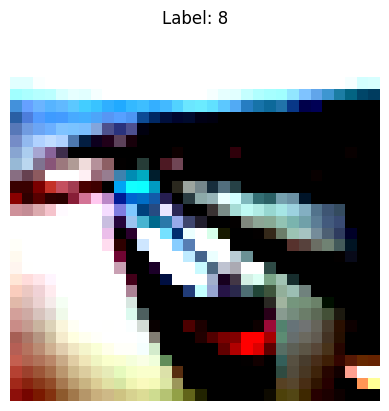

In [9]:
# Display the image
plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

## Details of Convolution Layers
- We can dump the weights and the shape of all the convolution layers
- You can also see the weight shapes of all convolution layers
- The output shapes are of `[out_ch, in_ch, kernel_h, kernel_w]`

In [10]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        print(f"{name}: {module.weight.shape}")

conv1: torch.Size([16, 3, 3, 3])
layer1.0.conv1: torch.Size([16, 16, 3, 3])
layer1.0.conv2: torch.Size([16, 16, 3, 3])
layer1.1.conv1: torch.Size([16, 16, 3, 3])
layer1.1.conv2: torch.Size([16, 16, 3, 3])
layer1.2.conv1: torch.Size([16, 16, 3, 3])
layer1.2.conv2: torch.Size([16, 16, 3, 3])
layer2.0.conv1: torch.Size([32, 16, 3, 3])
layer2.0.conv2: torch.Size([32, 32, 3, 3])
layer2.0.downsample.0: torch.Size([32, 16, 1, 1])
layer2.1.conv1: torch.Size([32, 32, 3, 3])
layer2.1.conv2: torch.Size([32, 32, 3, 3])
layer2.2.conv1: torch.Size([32, 32, 3, 3])
layer2.2.conv2: torch.Size([32, 32, 3, 3])
layer3.0.conv1: torch.Size([64, 32, 3, 3])
layer3.0.conv2: torch.Size([64, 64, 3, 3])
layer3.0.downsample.0: torch.Size([64, 32, 1, 1])
layer3.1.conv1: torch.Size([64, 64, 3, 3])
layer3.1.conv2: torch.Size([64, 64, 3, 3])
layer3.2.conv1: torch.Size([64, 64, 3, 3])
layer3.2.conv2: torch.Size([64, 64, 3, 3])


- The code below is to extract the output sizes
- The important part is to see how the output sizes change as we go deeper into the layers
  - That is the H,W get smaller but the C gets larger

In [11]:
def hook_fn(module, input, output):
    # The module object doesn't have the name directly here,
    # so we capture name via a closure below
    print(f"{module_name}: output shape {output.shape}")

# To pass names, register hooks with closures:
hooks = []
for name, layer in model.named_modules():
    if isinstance(layer, (torch.nn.Conv2d, torch.nn.BatchNorm2d)):
        module_name = name  # Capture name in closure

        # Use a lambda to keep the name bound correctly:
        hooks.append(layer.register_forward_hook(
            lambda module, input, output, module_name=module_name: 
                print(f"{module_name}: output shape {output.shape}")
        ))

# Dummy input for forward pass
dummy_input = torch.randn(1, 3, 32, 32)
with torch.no_grad():
    model(dummy_input)

# Remove hooks after use (good practice)
for h in hooks:
    h.remove()

conv1: output shape torch.Size([1, 16, 32, 32])
bn1: output shape torch.Size([1, 16, 32, 32])
layer1.0.conv1: output shape torch.Size([1, 16, 32, 32])
layer1.0.bn1: output shape torch.Size([1, 16, 32, 32])
layer1.0.conv2: output shape torch.Size([1, 16, 32, 32])
layer1.0.bn2: output shape torch.Size([1, 16, 32, 32])
layer1.1.conv1: output shape torch.Size([1, 16, 32, 32])
layer1.1.bn1: output shape torch.Size([1, 16, 32, 32])
layer1.1.conv2: output shape torch.Size([1, 16, 32, 32])
layer1.1.bn2: output shape torch.Size([1, 16, 32, 32])
layer1.2.conv1: output shape torch.Size([1, 16, 32, 32])
layer1.2.bn1: output shape torch.Size([1, 16, 32, 32])
layer1.2.conv2: output shape torch.Size([1, 16, 32, 32])
layer1.2.bn2: output shape torch.Size([1, 16, 32, 32])
layer2.0.conv1: output shape torch.Size([1, 32, 16, 16])
layer2.0.bn1: output shape torch.Size([1, 32, 16, 16])
layer2.0.conv2: output shape torch.Size([1, 32, 16, 16])
layer2.0.bn2: output shape torch.Size([1, 32, 16, 16])
layer2.0.d

## Details of BatchNorm Layers
- This is to get the batchnorm's tuning parameters as well.
- Take note that the batchnorm is applied channel-wise that's why you see 16, 32, and 64 elements for gamma and beta and the mean and variance normalization
- Equation wise we have:
$$ \hat{x}_c = \frac{x_c - \mu_c}{\sqrt{\sigma^2_c + \epsilon}}$$

$$ y_c = \gamma_c \cdot \hat{x}_c + \beta_c $$
- Note that after batchnorm the output shapes don't change

In [12]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.BatchNorm2d):
        print(f"{name}: gamma={module.weight.shape}, beta={module.bias.shape}")

bn1: gamma=torch.Size([16]), beta=torch.Size([16])
layer1.0.bn1: gamma=torch.Size([16]), beta=torch.Size([16])
layer1.0.bn2: gamma=torch.Size([16]), beta=torch.Size([16])
layer1.1.bn1: gamma=torch.Size([16]), beta=torch.Size([16])
layer1.1.bn2: gamma=torch.Size([16]), beta=torch.Size([16])
layer1.2.bn1: gamma=torch.Size([16]), beta=torch.Size([16])
layer1.2.bn2: gamma=torch.Size([16]), beta=torch.Size([16])
layer2.0.bn1: gamma=torch.Size([32]), beta=torch.Size([32])
layer2.0.bn2: gamma=torch.Size([32]), beta=torch.Size([32])
layer2.0.downsample.1: gamma=torch.Size([32]), beta=torch.Size([32])
layer2.1.bn1: gamma=torch.Size([32]), beta=torch.Size([32])
layer2.1.bn2: gamma=torch.Size([32]), beta=torch.Size([32])
layer2.2.bn1: gamma=torch.Size([32]), beta=torch.Size([32])
layer2.2.bn2: gamma=torch.Size([32]), beta=torch.Size([32])
layer3.0.bn1: gamma=torch.Size([64]), beta=torch.Size([64])
layer3.0.bn2: gamma=torch.Size([64]), beta=torch.Size([64])
layer3.0.downsample.1: gamma=torch.Size(

In [13]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.BatchNorm2d):
        gamma = module.weight.detach().cpu().numpy()  # scaling factors
        beta = module.bias.detach().cpu().numpy()     # shifting factors
        running_mean = module.running_mean.detach().cpu().numpy()  # BN running mean
        running_var = module.running_var.detach().cpu().numpy()    # BN running variance
        
        print(f"{name}:")
        print(f"  gamma (weight): {gamma}")
        print(f"  beta (bias): {beta}")
        print(f"  running_mean: {running_mean}")
        print(f"  running_var: {running_var}")

bn1:
  gamma (weight): [1.5526627e-01 1.6849441e-04 1.6422395e-01 2.4597718e-01 2.4168643e-01
 2.9948235e-01 2.7082115e-01 1.5834315e-01 2.1965967e-01 2.3017137e-01
 1.8188752e-05 2.4086523e-01 4.9744925e-01 2.5208536e-01 2.1383916e-01
 4.9488273e-01]
  beta (bias): [ 1.5800795e-01 -1.5458085e-03  2.6959175e-01  2.3261672e-01
  5.8447486e-01  4.8048597e-02  1.8260361e-01  2.6611036e-01
  2.7740982e-01  1.7184125e-01 -9.3694653e-05  2.3366748e-01
 -3.8434640e-01  1.7118131e-01  1.4031444e-01 -2.2242944e-01]
  running_mean: [ 9.4858594e-03 -3.0776630e-03  2.9638054e-02  3.8803276e-02
 -4.2789441e-02  2.1133550e-01 -7.1489461e-02  5.7417635e-02
  1.2818609e-02  2.5838863e-02  4.5296525e-05 -1.9672664e-01
  2.9637882e-01  5.0503600e-02  3.7058862e-04  2.7055228e-01]
  running_var: [9.2755193e-01 1.9267865e-04 2.0665903e-01 1.9045492e+00 3.0449352e-01
 8.6863130e-01 4.9514461e-01 3.7331530e-01 2.4662150e-01 1.1876168e+00
 6.0607135e-08 8.8195974e-01 1.5908778e+00 1.7840849e+00 8.1839460e-01

## Final layer

- The code below extracts the details of the avgpool and FC layer

In [23]:
avgpool_layer = model.avgpool
fc_layer = model.fc  # In this model, it's named 'linear'

print("Avgpool detail:", avgpool_layer)
print("FC layer weight shape:", fc_layer.weight.shape)
print("FC layer bias shape:", fc_layer.bias.shape)

Avgpool detail: AdaptiveAvgPool2d(output_size=(1, 1))
FC layer weight shape: torch.Size([10, 64])
FC layer bias shape: torch.Size([10])
